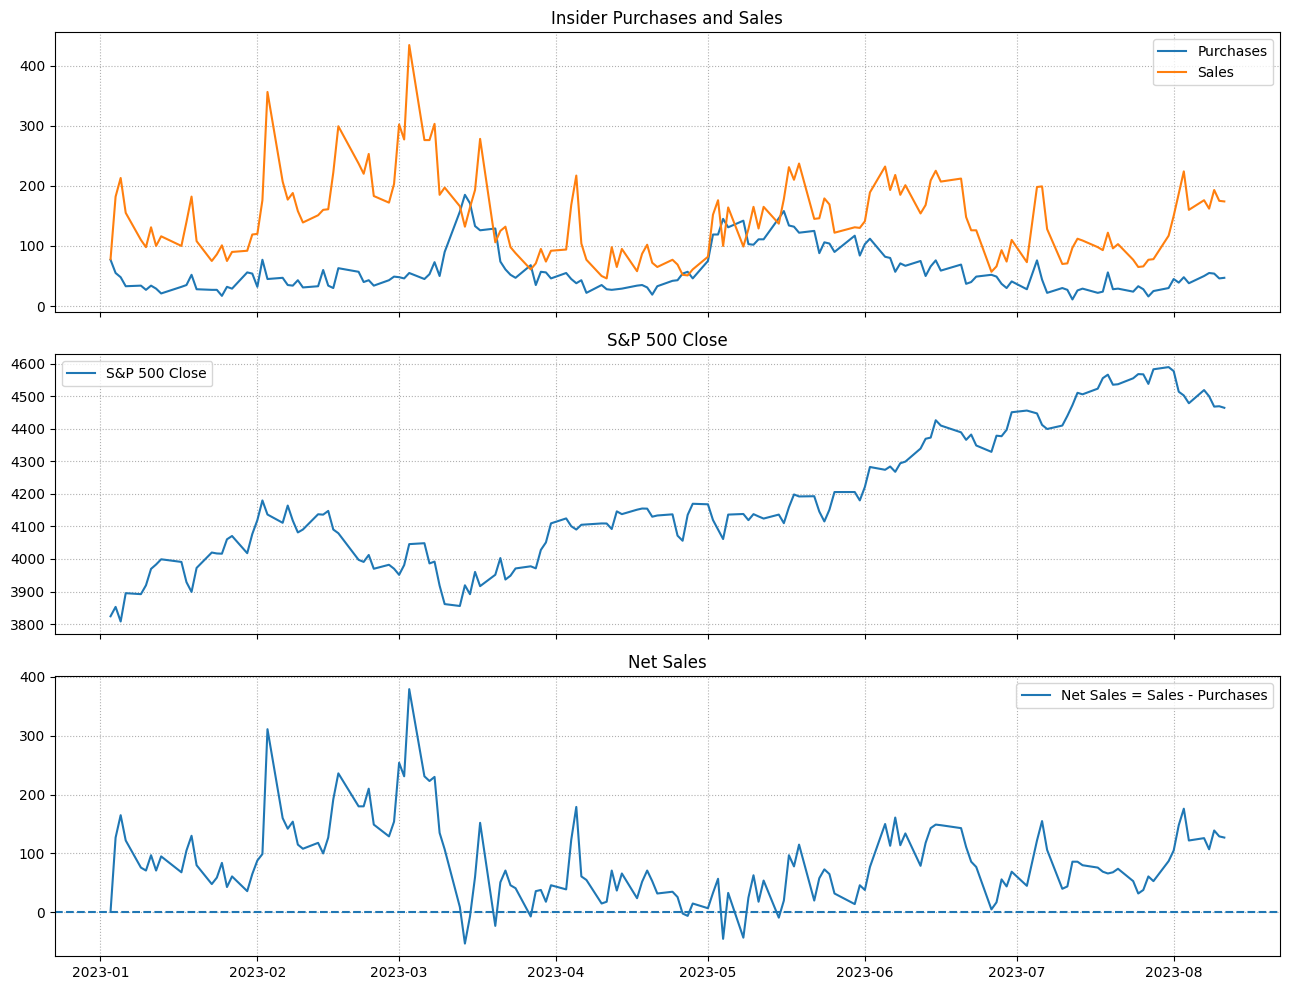

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# file paths
ins_path = r"/Users/tommasomarrucci/Desktop/My projects/Open Insider/Insider_data.csv"
spx_path = r"/Users/tommasomarrucci/Desktop/My projects/Open Insider/GSPC.csv"

# choose your window
start_date = "2023-01-01"   # set None to use the earliest
end_date   = "2023-08-13"   # set None to use the latest

# load data
ins = pd.read_csv(ins_path, parse_dates=["Date"]).sort_values("Date").set_index("Date")
spx = pd.read_csv(spx_path, parse_dates=["Date"]).sort_values("Date").set_index("Date")

# compute net
ins["Net"] = ins["Sales"] - ins["Purchases"]

# apply date filter
s = start_date if start_date is not None else ins.index.min()
e = end_date   if end_date   is not None else ins.index.max()

ins_win = ins.loc[s:e]
spx_win = spx.loc[s:e]

# plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 10), sharex=True)

ax1.plot(ins_win.index, ins_win["Purchases"], label="Purchases")
ax1.plot(ins_win.index, ins_win["Sales"], label="Sales")
ax1.set_title("Insider Purchases and Sales")
ax1.legend()
ax1.grid(True, linestyle=":")

ax2.plot(spx_win.index, spx_win["Close"], label="S&P 500 Close")
ax2.set_title("S&P 500 Close")
ax2.legend()
ax2.grid(True, linestyle=":")

ax3.plot(ins_win.index, ins_win["Net"], label="Net Sales = Sales - Purchases")
ax3.axhline(0, linestyle="--")
ax3.set_title("Net Sales")
ax3.legend()
ax3.grid(True, linestyle=":")

plt.tight_layout()
plt.show()